<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
oil_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp Đồng Tương Lai Dầu Thô WTI.csv', index_col=0, parse_dates=True)
exchange_rate_df=pd.read_csv('Dữ liệu Lịch sử USD_VND.csv', index_col=0, parse_dates=True)
gold_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp đồng Tương lai Vàng.csv', index_col=0, parse_dates=True)
stock_df=pd.read_csv('Dữ liệu Lịch sử VN Index.csv', index_col=0, parse_dates=True)

In [3]:
stock_df.count()

Lần cuối      3344
Mở            3344
Cao           3344
Thấp          3344
KL            3344
% Thay đổi    3344
dtype: int64

In [4]:
oil_price_df.head(5)

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,46.34,43.72,46.74,41.05,184.68K,3.90%
2009-05-01,48.81,47.04,49.28,45.56,258.76K,5.33%
2009-06-01,48.58,48.40,50.47,47.60,331.31K,-0.47%
2009-07-01,42.63,48.41,49.09,42.41,306.26K,-12.25%
2009-08-01,41.70,42.63,43.63,40.54,312.49K,-2.18%


In [5]:
exchange_rate_df.head(5)

,Lần cuối,Mở,Cao,Thấp,% Thay đổi
Ngày,,,,,
2009-01-01,"17,483.0","17,480.0","17,483.0","17,480.0",0.00%
2009-02-01,"17,479.0","17,420.0","17,535.0","17,400.0",-0.02%
2009-05-01,"17,472.0","17,480.0","17,540.0","17,400.0",-0.04%
2009-06-01,"17,477.5","17,400.0","17,531.5","17,400.0",0.03%
2009-07-01,"17,478.5","17,400.0","17,532.5","17,400.0",0.01%


In [6]:
gold_price_df.head(5)

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2022-05-31,"1,848.40","1,856.50","1,867.90","1,837.60",201.80K,-0.38%
2022-05-30,"1,855.40","1,847.79","1,862.10","1,846.54",-,0.42%
2022-05-29,"1,847.65","1,850.55","1,851.76","1,845.90",-,-0.52%
2022-05-27,"1,857.30","1,855.10","1,866.90","1,851.90",123.76K,0.18%
2022-05-26,"1,853.90","1,857.90","1,859.00","1,842.50",92.09K,0.08%


In [7]:
stock_df.head(5)

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,313.34,312.49,313.34,312.18,5.63K,-0.72%
2009-05-01,311.91,308.77,311.91,308.25,7.92K,-0.46%
2009-06-01,314.04,312.91,315.02,312.88,12.97K,0.68%
2009-07-01,319.58,320.40,322.59,319.29,14.75K,1.76%
2009-08-01,314.15,315.92,318.79,313.04,14.94K,-1.70%


In [8]:
exchange_rate_df[['Lần cuối']]

,Lần cuối
Ngày,
2009-01-01,"17,483.0"
2009-02-01,"17,479.0"
2009-05-01,"17,472.0"
2009-06-01,"17,477.5"
2009-07-01,"17,478.5"
...,...
2022-05-25,"23,190.0"
2022-05-26,"23,205.0"
2022-05-27,"23,195.0"


In [9]:
df_arr = [exchange_rate_df, oil_price_df, gold_price_df, stock_df]
df_name = ['Exchange Rate', 'Oil price', 'Gold price', 'Stock']
df = exchange_rate_df[['Lần cuối']]
df.rename(columns={'Lần cuối': df_name[0]}, inplace=True)
for index in range(1, 4, 1):
    dataframe = df_arr[index]
    # df.join(dataframe, how='outer')
    df = pd.concat([df, dataframe[['Lần cuối']]], axis=1)
    df.rename(columns={'Lần cuối': df_name[index]}, inplace=True)

d:\Python\Python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df

,Exchange Rate,Oil price,Gold price,Stock
Ngày,,,,
2009-01-01,"17,483.0",NaN,NaN,NaN
2009-01-04,"17,755.0",48.39,926.10,289.52
2009-01-05,"17,781.5",53.20,887.60,NaN
2009-01-06,"17,778.5",68.58,978.60,426.43
2009-01-07,"17,801.0",69.31,941.00,430.00
...,...,...,...,...
2022-11-04,NaN,94.29,"1,955.00",NaN
2022-11-05,"23,050.0",105.71,"1,861.00","1,301.53"
2022-12-01,"22,698.0",82.64,"1,833.70","1,510.51"


In [11]:
df.isna().sum()

Exchange Rate     59
Oil price         56
Gold price        48
Stock            191
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
len(df.dropna())

3299

In [14]:
df.isna().sum()

Exchange Rate    0
Oil price        0
Gold price       0
Stock            0
dtype: int64

In [15]:
df = df.replace(',','', regex=True)

df = df.replace('%','', regex=True)


In [16]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'Stock'], dtype='object')

In [17]:
for col in df.columns:
    df[col] = df[col].astype(np.float32)

In [18]:
df

,Exchange Rate,Oil price,Gold price,Stock
Ngày,,,,
2009-01-04,17755.0,48.389999,926.099976,289.519989
2009-01-06,17778.5,68.580002,978.599976,426.429993
2009-01-07,17801.0,69.309998,941.000000,430.000000
2009-01-09,17820.0,68.050003,954.700012,547.690002
2009-01-10,17837.0,70.820000,999.500000,568.989990
...,...,...,...,...
2022-11-03,22873.0,109.330002,1993.099976,1466.540039
2022-11-05,23050.0,105.709999,1861.000000,1301.530029
2022-12-01,22698.0,82.639999,1833.699951,1510.510010


In [19]:
ds = df[df.index > '2021-01-01']

In [20]:
# df=df.resample('1H').mean()

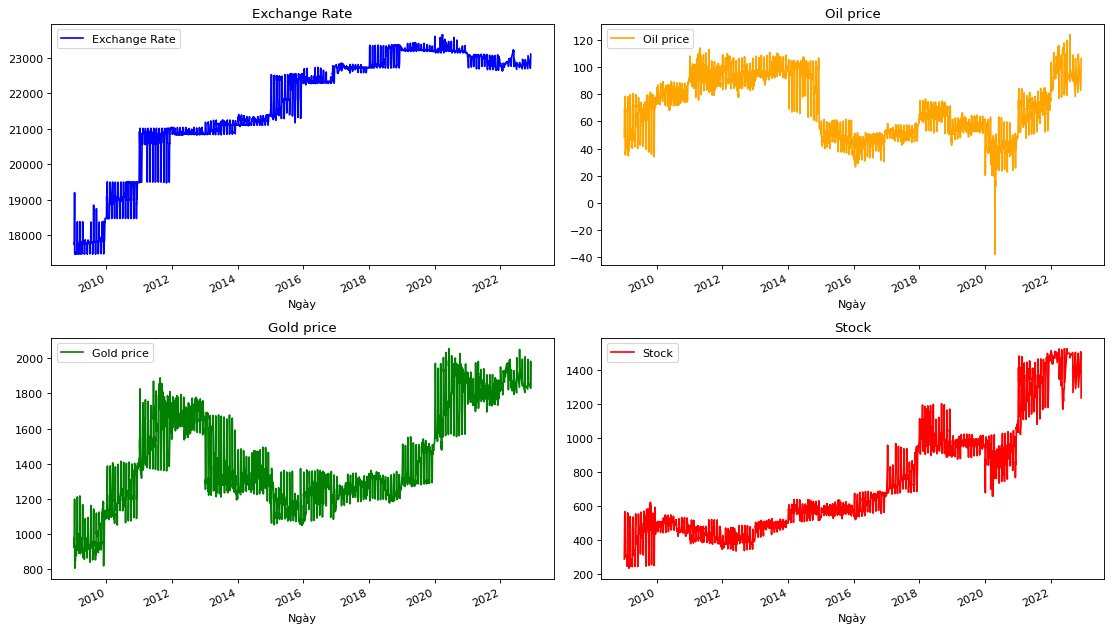

In [21]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [22]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Exchange Rate - Series is Stationary
Oil price - Series is not Stationary
Gold price - Series is not Stationary
Stock - Series is not Stationary


In [23]:
df['Exch_rate_1_diff'] = df['Exchange Rate'] - df['Exchange Rate'].shift(1)
df.dropna(inplace=True)

In [24]:
df['Oil_1_diff'] = df['Oil price'] - df['Oil price'].shift(1)
df.dropna(inplace=True)

In [25]:
df['Gold_1_diff'] = df['Gold price'] - df['Gold price'].shift(1)
df.dropna(inplace=True)

In [26]:
df['Stock_1_diff'] = df['Stock'] - df['Stock'].shift(1)
df.dropna(inplace=True)

In [27]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Exchange Rate - Series is Stationary
Oil price - Series is not Stationary
Gold price - Series is not Stationary
Stock - Series is not Stationary
Exch_rate_1_diff - Series is Stationary
Oil_1_diff - Series is Stationary
Gold_1_diff - Series is Stationary
Stock_1_diff - Series is Stationary


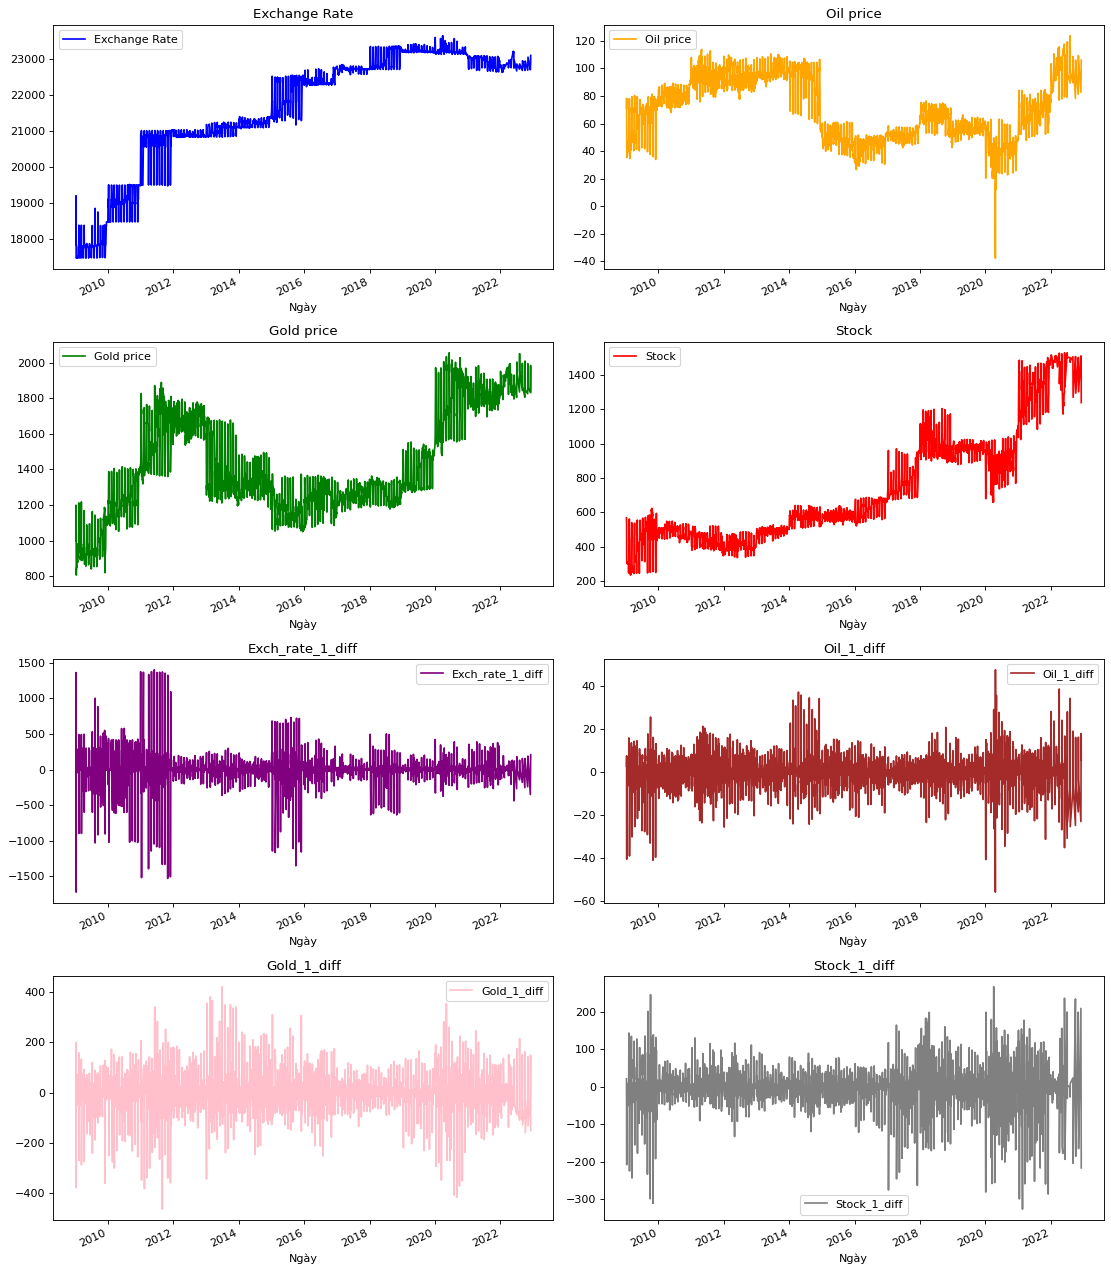

In [28]:
Visualize(df)

 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [30]:
max_lags=8
y='Stock_1_diff'

In [44]:
# grangercausalitytests(df[[y,'Gold_1_diff']], max_lags, verbose=False)

In [31]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'Stock', 'Exch_rate_1_diff',
       'Oil_1_diff', 'Gold_1_diff', 'Stock_1_diff'],
      dtype='object')

In [29]:
# results = grangercausalitytests(df[[y,'Oil_1_diff']], max_lags, verbose=False)
# results['Oil price'][0]['ssr_ftest'][1]

In [33]:
for i in range(4,len(df.columns)):
  results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Column - Exch_rate_1_diff : P_Values - [0.3769, 0.337, 0.4547, 0.6977, 0.7345, 0.8086, 0.9232, 0.9647]
Column - Oil_1_diff : P_Values - [0.0721, 0.0266, 0.0003, 0.0009, 0.0009, 0.0006, 0.0002, 0.0004]
Column - Gold_1_diff : P_Values - [0.0325, 0.0001, 0.0001, 0.0003, 0.002, 0.0045, 0.0112, 0.0193]
Column - Stock_1_diff : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [37]:
df_input=df[['Stock_1_diff','Gold_1_diff','Oil_1_diff']]

In [38]:
df_input

,Stock_1_diff,Gold_1_diff,Oil_1_diff
Ngày,,,
2009-01-10,21.299988,44.799988,2.769997
2009-01-12,-54.070007,199.599976,7.550003
2009-01-13,-207.789978,-379.000000,-40.590004
2009-01-14,0.850006,-11.899963,-0.500000
2009-01-15,-3.970001,-1.500000,-1.879997
...,...,...,...
2022-11-03,-35.169922,143.199951,16.230003
2022-11-05,-165.010010,-132.099976,-3.620003
2022-12-01,208.979980,-27.300049,-23.070000


In [39]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [40]:
df_train.shape

(2965, 3)

In [41]:
df_test.shape

(330, 3)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [42]:
model = VAR(df_train)
for i in range(48):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

d:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Order =  1
AIC:  19.35323272743337
BIC:  19.37750112818809
Order =  2
AIC:  19.27393796179203
BIC:  19.316419604889916
Order =  3
AIC:  19.219247134251376
BIC:  19.27995226586678
Order =  4
AIC:  19.169361426218554
BIC:  19.24830030186731
Order =  5
AIC:  19.122903757115317
BIC:  19.22008664166642
Order =  6
AIC:  19.09146716851004
BIC:  19.20690433619737
Order =  7
AIC:  19.079447008027795
BIC:  19.21314874246183
Order =  8
AIC:  19.063187106632846
BIC:  19.215163700812397
Order =  9
AIC:  19.04669706681873
BIC:  19.216958823142722
Order =  10
AIC:  19.03737471767024
BIC:  19.225931947949476
Order =  11
AIC:  19.03186937273778
BIC:  19.238732398206743
Order =  12
AIC:  19.028198974157263
BIC:  19.253378125485938
Order =  13
AIC:  19.008140232795718
BIC:  19.251645850101422
Order =  14
AIC:  19.003998681199967
BIC:  19.265841114059214
Order =  15
AIC:  18.988081018418075
BIC:  19.26827062587844
Order =  16
AIC:  18.963553565479017
BIC:  19.262100716071032
Order =  17
AIC:  18.921987132

In [43]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,19.39,19.39,2.628e+08,19.39
1,19.29,19.32,2.395e+08,19.30
2,19.21,19.26,2.209e+08,19.23
3,19.18,19.24,2.139e+08,19.20
4,19.13,19.21,2.034e+08,19.16
5,19.09,19.18,1.943e+08,19.12
6,19.05,19.17,1.882e+08,19.10
7,19.04,19.18,1.860e+08,19.09
8,19.03,19.18,1.831e+08,19.08
9,19.01,19.18,1.799e+08,19.07


In [91]:
model = VAR(df_train)
results = model.fit(maxlags=2)

d:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [92]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Jun, 2022
Time:                     11:04:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.3164
Nobs:                     2963.00    HQIC:                   19.2892
Log likelihood:          -41146.3    FPE:                2.34728e+08
AIC:                      19.2739    Det(Omega_mle):     2.33072e+08
--------------------------------------------------------------------
Results for equation Stock_1_diff
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.254443         0.755134            0.337           0.736
L1.Stock_1_diff        -0.208219         0.019853          -10.488           0.000
L1.Gold_1_diff          0.046326         0.01

In [93]:
lag=results.k_ar

In [94]:
results.forecast(df_train.values[-lag:],steps=5)

array([[ 1.08007861e+01, -7.15642230e+00,  7.81303806e-02],
       [-1.60131499e+00, -1.18878667e+00, -6.82213591e-02],
       [-1.37292781e+00,  1.30613744e+00, -6.51895003e-02],
       [ 7.52910192e-01,  2.59772558e-01,  2.14890491e-02],
       [ 3.67578667e-01,  1.29278038e-01,  6.55196841e-03]])

In [96]:
df_test[0:5]

,Stock_1_diff,Gold_1_diff,Oil_1_diff
Ngày,,,
2021-01-21,29.529907,-1.000000,-0.110001
2021-01-22,2.570068,-11.900024,-0.860001
2021-01-25,-0.729980,-0.599976,0.500000
2021-01-26,-29.930054,-4.000000,-0.160000
2021-01-27,-38.949951,-6.000000,0.239998
2021-01-28,-73.230042,-8.199951,-0.509998
2021-01-29,32.669983,8.199951,-0.139999
2021-02-02,18.920044,-16.400024,2.559998
2021-02-03,111.079956,-97.299927,4.990002


In [97]:
df_coeff=pd.DataFrame([results.params['Stock_1_diff'],results.pvalues['Stock_1_diff']]).T

In [98]:
df_coeff

,Stock_1_diff,Stock_1_diff
const,0.254443,7.361544e-01
L1.Stock_1_diff,-0.208219,9.782957e-26
L1.Gold_1_diff,0.046326,3.177400e-05
L1.Oil_1_diff,0.232312,8.431741e-02
L2.Stock_1_diff,-0.144368,2.939320e-13
L2.Gold_1_diff,0.047409,2.212875e-05
L2.Oil_1_diff,0.111195,4.078837e-01


In [99]:
df_coeff.columns = ['coeff','pval']

In [100]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval'] < 0.05,1, 0)

array([0, 1, 1, 0, 1, 1, 0])

In [101]:
df_coeff['valid']=np.where(df_coeff['pval'] < 0.05,1, 0)

In [102]:
df_coeff

,coeff,pval,valid
const,0.254443,7.361544e-01,0
L1.Stock_1_diff,-0.208219,9.782957e-26,1
L1.Gold_1_diff,0.046326,3.177400e-05,1
L1.Oil_1_diff,0.232312,8.431741e-02,0
L2.Stock_1_diff,-0.144368,2.939320e-13,1
L2.Gold_1_diff,0.047409,2.212875e-05,1
L2.Oil_1_diff,0.111195,4.078837e-01,0


In [103]:
#coeff_arr=np.multiply(df_coeff['coeff'], df_coeff['valid'])[1:].values
coeff_arr=df_coeff['coeff'][1:].values

In [104]:
coeff_arr.shape

(6,)

In [105]:
coeff_arr

array([-0.20821947,  0.04632593,  0.23231216, -0.14436779,  0.04740878,
        0.11119494])

In [85]:
df_train[-lag:]

,Stock_1_diff,Gold_1_diff,Oil_1_diff
Ngày,,,
2020-12-18,15.689941,-1.299927,0.739998
2020-12-21,13.619995,-5.800049,-1.359997
2020-12-22,2.369995,-11.800049,-0.720001
2020-12-23,-4.549927,6.900024,1.099998
2020-12-24,-11.380005,5.800049,0.110001
2020-12-28,23.809937,-2.400024,-0.610001
2020-12-29,8.160034,3.099976,0.380001
2020-12-30,-1.949951,11.300049,0.400002
2020-12-31,6.329956,2.199951,0.119999


In [106]:
in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [107]:
in_arr.shape

(1, 6)

In [108]:
in_arr

array([[  3.6800537 ,  25.5       ,   0.26000214, -60.93994   ,
         25.400024  ,   0.61999893]], dtype=float32)

In [109]:
np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

array([10.80078608])

In [44]:
exog = df_input['Stock_1_diff']
mod = sm.tsa.VARMAX(df_input[['Gold_1_diff', 'Oil_1_diff']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

d:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 Statespace Model Results                                
Dep. Variable:     ['Gold_1_diff', 'Oil_1_diff']   No. Observations:                 3295
Model:                                   VARX(2)   Log Likelihood              -28991.756
Date:                           Thu, 09 Jun 2022   AIC                          58009.512
Time:                                   14:24:37   BIC                          58088.814
Sample:                                        0   HQIC                         58037.901
                                          - 3295                                         
Covariance Type:                             opg                                         
Ljung-Box (L1) (Q):            0.38, 11.19   Jarque-Bera (JB):   11073.60, 12206.57
Prob(Q):                        0.54, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.68, 1.36   Skew:                     -0.25, -0.48
Prob(H) (two-sided):        

In [45]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()


In [46]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    res=pd.DataFrame({"Pred1":yhat['Stock_1_diff'], "Pred2":yhat['Act2'], 
                      "Act1":test["Stock_1_diff"].values, "Act2":test["Act2"].values})
    return res

df_ret = VARMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")

d:\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
d:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

KeyboardInterrupt

